In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import sys

In [2]:
train_data = pd.read_csv('../../data/Kmers6_counts_600bp.csv')
train_methys = pd.read_csv('../../data/Mouse_DMRs_methylation_level.csv',header = None)

In [9]:
validation_split = 0.2
shuffle_dataset = True
random_seed= 6

dataset_size = len(train_data)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

In [10]:
cell_type = 5
X = train_data.as_matrix()
#X = np.concatenate([X,np.ones((len(X),1))],axis = 1)
train_X = X[train_indices]
val_X = X[val_indices]
Y = np.array(train_methys[cell_type])

train_Y = Y[train_indices]
val_Y = Y[val_indices]

/home/AD/h5li/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [11]:
print(train_X.shape,train_Y.shape,val_X.shape,val_Y.shape)

(47168, 2080) (47168,) (11791, 2080) (11791,)


# LASSO

In [12]:
clf = Lasso(alpha = 0.000221221629107045,max_iter=2000,tol=1e-6)

In [13]:
clf.fit(train_X,train_Y)

Lasso(alpha=0.000221221629107045, copy_X=True, fit_intercept=True,
   max_iter=2000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=1e-06, warm_start=False)

In [14]:
clf.score(train_X,train_Y)

0.2824333025533451

In [15]:
clf.score(val_X,val_Y)

0.23379022313858536

In [19]:
feature_importance = []
for i,v in enumerate(clf.coef_):
    feature_importance.append([abs(v),v,train_data.columns[i]])

In [29]:
feature_importance = sorted(feature_importance,reverse=True)

In [30]:
np.save('LASSO_SelectedFeatures.npy',np.array(feature_importance[:128]))

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 24)

In [14]:
clf = Lasso(alpha = 0.000221221629107045,max_iter=2000,tol=1e-6)

In [15]:
clf.fit(X_train,Y_train)

Lasso(alpha=0.000221221629107045, copy_X=True, fit_intercept=True,
   max_iter=2000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=1e-06, warm_start=False)

In [16]:
print('Train Score: ',clf.score(X_train,Y_train))
print('Test Score: ', clf.score(X_test,Y_test))
print("Nonzero Coefficients: ", len([_ for _ in clf.coef_ if _ != 0]))

Train Score:  0.2809041128632571
Test Score:  0.23795892791718964
Nonzero Coefficients:  1287


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
results = np.load('pytorchResults.npy')
resultsPretrained = np.load('pytorchResultsPretrained.npy')

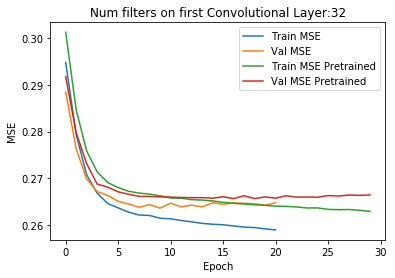

In [40]:
plt.plot(results[0,1:],label="Train MSE")
plt.plot(results[1,1:],label = "Val MSE")
plt.plot(resultsPretrained[0,1:],label="Train MSE Pretrained")
plt.plot(resultsPretrained[1,1:],label = "Val MSE Pretrained")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Num filters on first Convolutional Layer:32")
plt.legend()
plt.savefig('img_files/32filters6Size.png')

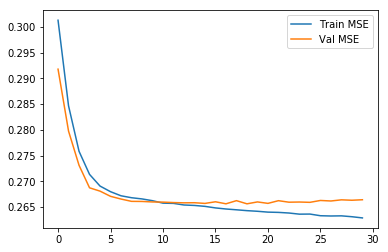

In [31]:

plt.plot(results[0,1:],label="Train MSE")
plt.plot(results[1,1:],label = "Val MSE")
plt.legend()
plt.show()

In [10]:
import pandas as pd

In [11]:
train_methys = pd.read_csv('../../data/Mouse_DMRs_methylation_level.csv',header = None)

In [12]:
train_methys

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.844830,0.928570,0.872090,0.105260,0.300000,0.807690,0.964290,0.94231,0.959750,0.968750,0.957450,0.866670,0.942580,0.891890,0.959180,1.000000
1,0.713590,0.964290,0.260640,0.880950,0.790700,0.980000,0.952380,0.94697,0.876970,0.888360,0.679720,0.959680,0.784870,0.900000,0.767060,0.970710
2,0.086957,0.000000,0.030612,0.647060,0.510200,0.120000,0.722220,0.73333,0.484380,0.582780,0.522730,0.200000,0.537780,0.780550,0.569830,0.845070
3,0.972220,0.894740,0.806720,0.950000,0.378790,0.720590,0.300000,0.16883,0.547620,0.678900,0.335620,0.166670,0.026042,0.387620,0.141380,0.368000
4,0.362200,0.863640,0.708610,0.687500,0.678260,0.591400,0.617650,0.49254,0.655390,0.212700,0.419350,0.084507,0.488050,0.535300,0.710330,0.789770
5,0.738640,0.818180,0.819440,0.487800,0.759260,0.828570,0.814810,0.71233,0.277950,0.021739,0.038462,0.000000,0.196490,0.235850,0.271320,0.262500
6,0.863640,1.000000,0.941180,0.952380,0.777780,0.790700,0.880000,0.89189,0.852000,0.444440,0.214290,0.470590,0.621790,0.927800,0.816510,0.931030
7,0.777780,0.937500,0.865380,1.000000,1.000000,0.957450,1.000000,0.20000,0.515560,0.785710,0.575000,0.857140,0.725000,0.876980,0.518520,0.888890
8,0.975900,1.000000,0.931510,1.000000,1.000000,1.000000,0.933330,0.83333,0.297300,0.546050,0.740000,1.000000,0.951870,0.959850,0.696430,0.675680
9,0.666670,0.888890,0.719750,0.272730,0.219050,0.178570,0.543860,0.95833,0.791960,0.304490,0.078212,0.245900,0.123670,0.189020,0.171520,0.688740
